In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/CodersCave/Phase_2/Normal_Task/spam.csv', encoding='latin-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [11]:
X =  df.drop('v1', axis=1)
y = df['v1']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
vectorizer = CountVectorizer()

In [17]:
X_train_vectorized = vectorizer.fit_transform(X_train['v2'])
X_test_vectorized = vectorizer.transform(X_test['v2'])

In [46]:
accuracy_list=[]

Accuracy : 0.9004484304932735


<Axes: >

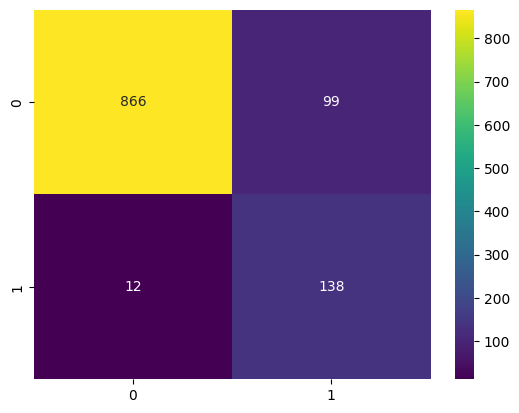

In [47]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_vectorized.toarray(), y_train)

y_pred = model.predict(X_test_vectorized.toarray())

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :",accuracy)
accuracy_list.append(["GaussianNB",accuracy])

sns.heatmap(cm, annot=True,fmt='g',cmap='viridis')

Accuracy : 0.9748878923766816


<Axes: >

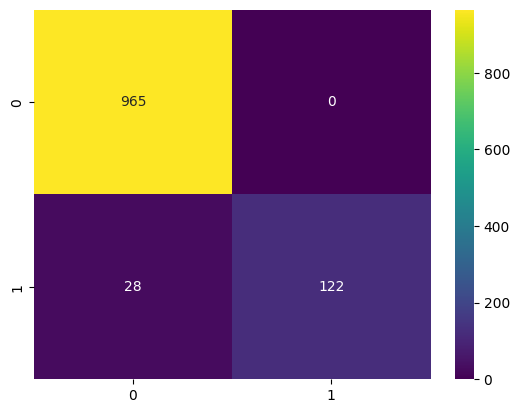

In [48]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :",accuracy)
accuracy_list.append(["BernoulliNB",accuracy])

sns.heatmap(cm, annot=True,fmt='g',cmap='viridis')

Accuracy : 0.9838565022421525


<Axes: >

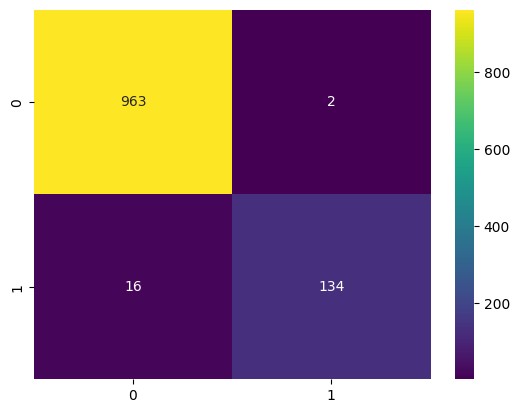

In [49]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :",accuracy)
accuracy_list.append(["MultinomialNB",accuracy])

sns.heatmap(cm, annot=True,fmt='g',cmap='viridis')

In [51]:
print("Accuracy")
for i in accuracy_list:
  print(i[0],"--->",i[1])

Accuracy
GaussianNB ---> 0.9004484304932735
BernoulliNB ---> 0.9748878923766816
MultinomialNB ---> 0.9838565022421525
